# Analyse de l'Avare de Molière

## Get the text

In [1]:
import urllib.request
response = urllib.request.urlopen("http://dramacode.github.io/markdown/moliere_avare.txt")
html = response.read()
text = html.decode("utf-8")

## Parse it

### Prepare a function to uniformize date

In [2]:
import unicodedata
def decode(str) :
    return unicodedata.normalize('NFKD', str).lower().encode('ASCII', 'ignore').decode()

### Get name of characters

In [11]:
import pandas as pd
body = text.split("\n# ")[2]
acts = body.split("\n## ")[1:]

actors = text.split("\n#")[1].strip().split("\n")
name_actors = []
for i in range(len(actors)):
    if actors[i][:3]==" – ":
        name_actors.append(decode(actors[i][3:actors[i].find(",")].lower()))

name_actors

['harpagon',
 'cleante',
 'elise',
 'valere',
 'mariane',
 'anselme',
 'frosine',
 'maitre simon',
 'maitre jacques',
 'la fleche',
 'dame claude',
 'brindavoine',
 'la merluche',
 'le commissaire']

### Extract replicas with context informations : act, scene and character

In [5]:
data = []
for act in acts : 
    title_act = act[:act.find("\n")]
    body_act = act[len(title_act)+1:]
    
    scenes= body_act.split("\n### ")
    for scene in scenes : 
        title_scene = scene[:scene.find("\n")]
        body_scene = scene[len(title_scene)+1:]
        if len(title_scene) >0:
            replicas= body_scene.split("\n    ")[1:]
            for rep in replicas : 
                name =rep[:rep.find(".\n")].strip().lower()
                body_replica= rep[len(name)+1:].strip()
               # scenes_dict[title_act][title_scene][name].append(body_replica)
                data.append([title_act,title_scene,decode(name.split("*")[0].split(",")[0].strip()),body_replica,len(body_replica.split(" "))])
                
# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['Act', 'Scene',"Character","replica","length"])


In [6]:
# Observe number of word per character (and sort according to it)

In [7]:
from  collections import Counter
number_of_words = Counter()
for char in name_actors:
    select_replicas = df.loc[df["Character"]==char]
    number_of_words[char]= sum(select_replicas["length"])
number_of_words.most_common()

[('harpagon', 5862),
 ('cleante', 3166),
 ('valere', 2594),
 ('frosine', 2223),
 ('maitre jacques', 1579),
 ('la fleche', 1435),
 ('elise', 1021),
 ('mariane', 857),
 ('anselme', 483),
 ('le commissaire', 277),
 ('maitre simon', 186),
 ('la merluche', 49),
 ('brindavoine', 38),
 ('dame claude', 0)]

Réalisez un graphique qui montrera le nombre de mots que chaque acteur prononce dans chaque scène. Pour cela, vous pouvez vous inspirer de l'étude de l'Avare de Molière réalisée par l'OBVIL (graphe de gauche). Dans ce graphique, les lignes sont de longueur égale et la hauteur représente le nombre de mots prononcés au total dans la scène. La largeur de chaque rectangle indique le pourcentage de la scène qu’un acteur occupe.

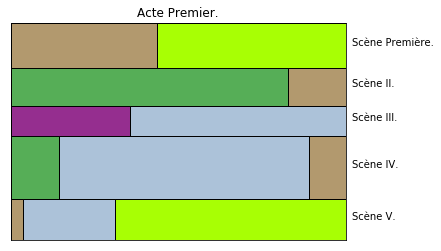

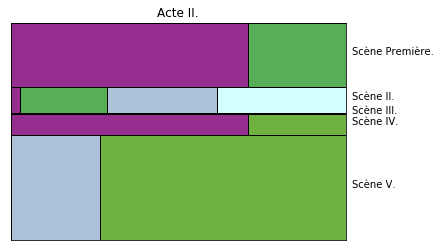

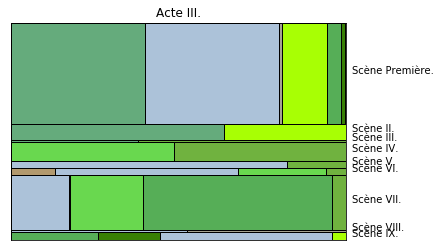

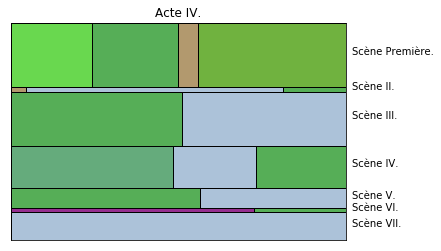

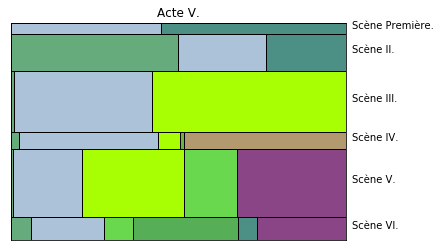

In [10]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolors
%matplotlib inline  

map_colors= dict()
for i,char in enumerate(name_actors): 
    map_colors[char]=list(mcolors.XKCD_COLORS)[i]
    i+=1


acts = []
for act in df["Act"] :
    if act not in acts :
        acts.append(act)
    
        plt.subplot()
       # plt.axis("off")
        plt.title(act)
        ax = plt.gca()
        

        this_act = df.loc[df["Act"]==act]
        y=0
        already_seen  =[]
        for scene in  this_act["Scene"]:
            
            if scene not in already_seen :
                
                df_of_this_scene = this_act.loc[this_act["Scene"]==scene]
                number_of_words= Counter()
                for char in set(df_of_this_scene["Character"] ) :
                    select_replicas = df_of_this_scene.loc[df["Character"]==char]
                    number_of_words[char]= sum(select_replicas["length"])
                s = sum(number_of_words.values())
                x=0
                for char in set(df_of_this_scene["Character"] ) :
                    
                    ax.add_patch(Rectangle((x,y),number_of_words[char]*10.0/s,-s/100.0,facecolor = map_colors[char],edgecolor="black"))
                    x+= number_of_words[char]*10.0/s

                plt.text(10.2,y-s/200.0,scene)
                y-=s/100.0
                already_seen.append(scene)
        ax.set(xlim=(0, 10), ylim=(y, 0))
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        plt.show()
   
    